In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [2]:
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    random_state=42
)

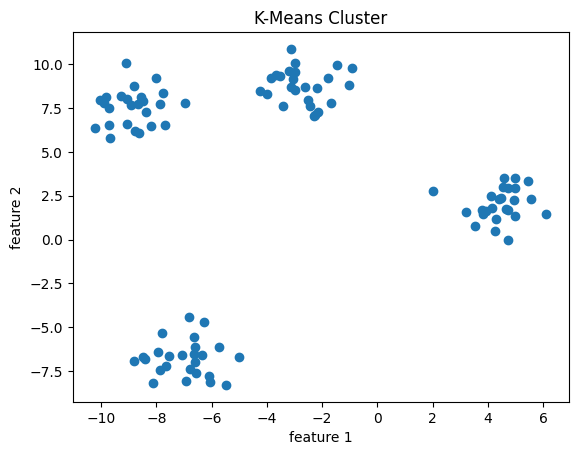

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],y=X[:,1])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("K-Means Cluster")
plt.show()

In [4]:
# I know there are 4 clusters in the dataset based on domain knowledge, so I set n_clusters = 4.
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    max_iter=100,
    random_state=42
)

In [5]:
label = kmeans.fit_predict(X)

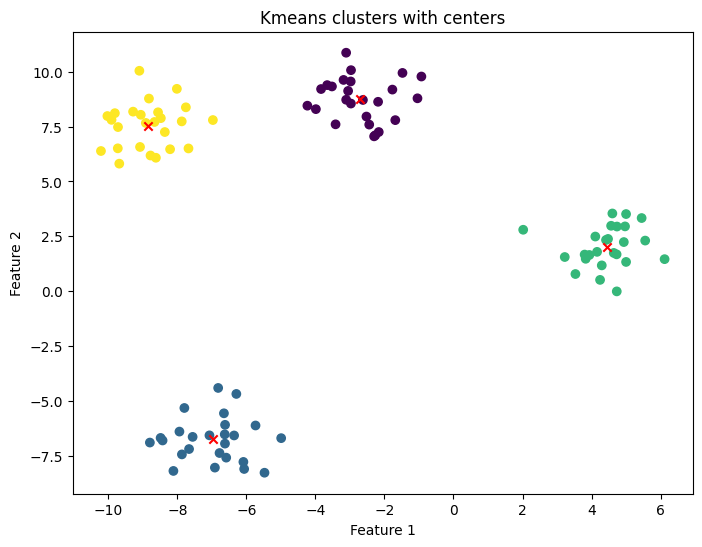

In [6]:
plt.figure(figsize=(8,6))

plt.scatter(x=X[:,0], y=X[:,1],c=label)
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker="x",c="red")
plt.title("Kmeans clusters with centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [7]:
# Use evaluation methods to determine the optimal number of clusters (K)

# Elbow Method

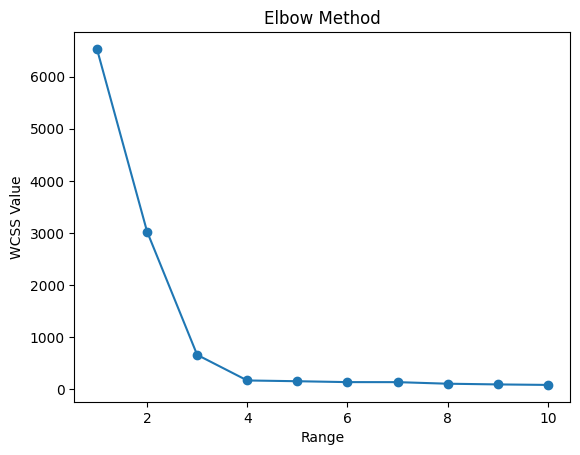

In [8]:
# Use the Elbow Method to find the optimal number of clusters

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

# Plot Diagram

plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Range")
plt.ylabel("WCSS Value")
plt.show()

In [9]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


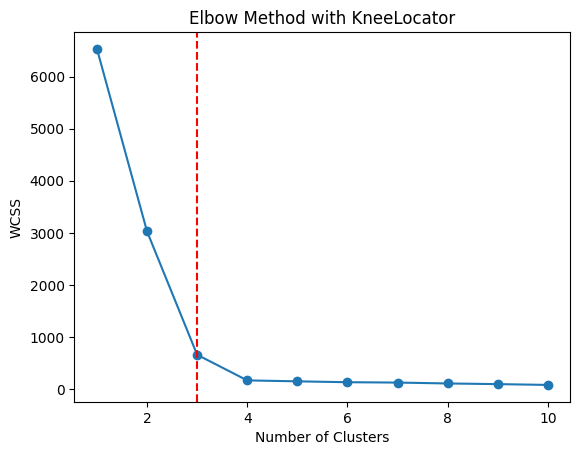

Detected elbow: 3


In [10]:
# WE have knee locater that automatic show which k value is best for the dataset.

from kneed import KneeLocator

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

plt.plot(range(1, 11), wcss, marker='o')
plt.axvline(kneedle.elbow, color='r', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method with KneeLocator')
plt.show()

print("Detected elbow:", kneedle.elbow)


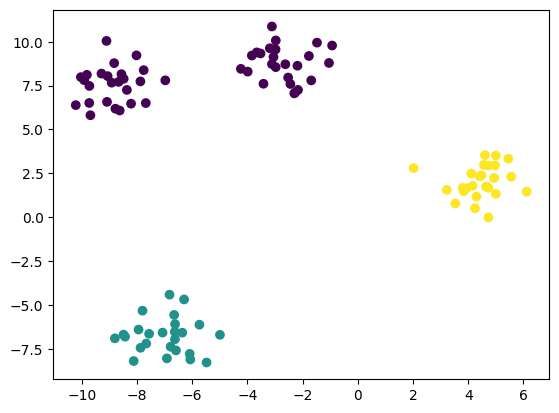

In [11]:
# plot with three n_cluster = 3
kmeans = KMeans(
    n_clusters=3,
    random_state=42
)

labels = kmeans.fit_predict(X)
plt.scatter(x=X[:,0],y=X[:,1],c=labels)

# Relying solely on the Elbow Method here is not ideal.
# We know the dataset actually has 4 clusters, but the Elbow Method/KneeLocator suggested 3.
# Dropping a cluster can cause us to lose important patterns in the data.
# Therefore, we set n_clusters = 4 manually.

plt.show()

# Silhouette Score Method

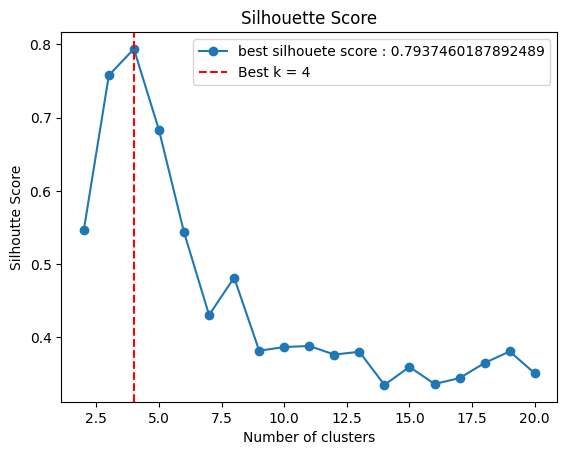

In [24]:
from sklearn.metrics import silhouette_score
import numpy as np

ss=[]
k_values = range(2,21)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X,labels, random_state=42)
    ss.append(silhouette)


# Find best k
best_idx = np.argmax(ss)
best_k = list(K)[best_idx]
best_score = ss[best_idx]


# plot Silhouette score
plt.plot(range(2,21), ss, marker='o',label=f"best silhouete score : {best_score}")
plt.axvline(best_k,color='red', linestyle="--", label=f"Best k = {best_k}")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Score")
plt.legend()
plt.show()

In [25]:
# The Silhouette Score correctly identified the true number of clusters (k = 4), compared to the Elbow method.